## Alejo Vinluan (abv210001)

# Image Classification

## Overview

This assignment explores image classification in Keras. It uses a sequential model to evaluate the test data. This is repeated with different architectures such as RNN and CNN for evaluation. Finally, a pretrained model is used for classification. 

## Dataset 

The dataset utilized is Animal Crossing vs Doom. Doom and Animal Crossing are video games with different art styles in that Animal Crossing is a relaxing game where you design an island and Doom is a First Person Shooter where you slay hordes of demons. 

In this instance, we will use classification so that

* Doom - 0

* Animal Crossing - 1

source: https://www.kaggle.com/datasets/andrewmvd/doom-crossing?resource=download&select=animal_crossing

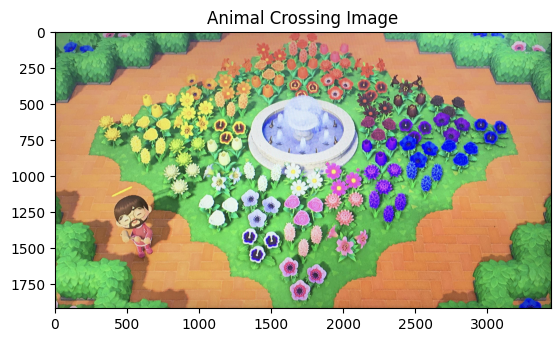

In [1]:
# An example of Animal Crossing
import matplotlib.pyplot as plt

img = plt.imread('data/animal_crossing/0czcmw8rmsz41.jpg')

plt.title("Animal Crossing Image")
plt.imshow(img)
plt.show()

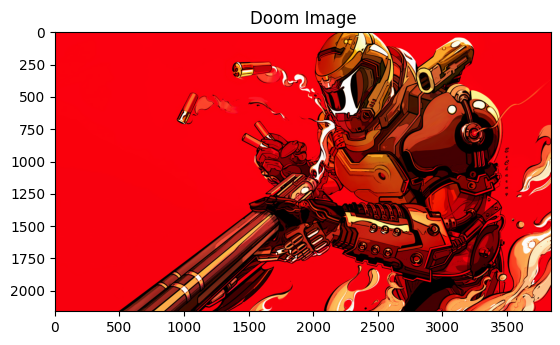

In [2]:
# An example of Doom
img = plt.imread('data/doom/a46ep8c89jq41.jpg')

plt.title("Doom Image")
plt.imshow(img)
plt.show()

In [16]:
# Prepare the dataset
import os
import pandas as pd
import cv2

animal_crossing_csv = pd.read_csv('data/animal_crossing_dataset.csv')
doom_csv = pd.read_csv('data/doom_dataset.csv')

# Prepare x-axis for images and y-axis for labels
x = []
y = []

# Gather images from directories
animal_crossing_images = os.listdir('data/animal_crossing')
doom_images = os.listdir('data/doom')

# Prepare all Animal Crossing images
for file_name in animal_crossing_images:
    image_path = 'data/animal_crossing/' + file_name
    try:
        # Use OpenCV to read the image and convert to RGB
        img_arr = cv2.imread(image_path)[...,::-1]
        # Convert the image to greyscale
        grayscale_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        # Resize the array
        resized_arr = cv2.resize(grayscale_arr, (224, 224))
        x.append(resized_arr)
        y.append('animal_crossing')
    except Exception:
        pass

# Prepare all Doom images
for file_name in doom_images:
    image_path = 'data/doom/' + file_name
    try:
        # Use OpenCV to read the image
        img_arr = cv2.imread(image_path)
        # Convert the image to greyscale
        grayscale_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        # Resize the array
        resized_arr = cv2.resize(grayscale_arr, (224, 224))
        x.append(resized_arr)
        y.append('doom')
    except Exception:
        pass


    

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
